#Multiclass Classification BloodMNIST Dataset Part 2

Source For Codes

1.https://colab.research.google.com/drive/1LRlehId853iY2QytjFdZJuNb4mJfdNoY?usp=sharing

2.https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/

3.https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [ ]:
# Built-in Imports
import random

In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#BloodMINIST dataset was used for multiclass models
DATA_NAME = "BloodMNIST"

In [ ]:
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]

--2023-04-02 21:03:28--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22841 (22K) [text/plain]
Saving to: ‘info.py’

info.py             100%[===================>]  22.31K  --.-KB/s    in 0.002s  

2023-04-02 21:03:28 (11.2 MB/s) - ‘info.py’ saved [22841/22841]



In [ ]:
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz", 
                     origin=data["url"], 
                     md5_hash=data["MD5"])

35461855/35461855 [==============================] - 0s 0us/step


In [ ]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x2 = dataset["train_images"]
train_y2 = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x2 = dataset["val_images"]
val_y2 = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x2 = dataset["test_images"]
test_y2 = dataset["test_labels"]

In [ ]:
#data generator was used to increase the number of samples for model training.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

In [ ]:
#Generated data were added to train and validation groups
data_generator.fit(np.append(train_x2, val_x2, 0))

In [ ]:
print(train_x2.shape)
print(val_x2.shape)
print(test_x2.shape)

(11959, 28, 28, 3)
(1712, 28, 28, 3)
(3421, 28, 28, 3)


In [ ]:
#original shape was reshape to match the input layer of the model
train_x2 = np.reshape(train_x2, (11959, 28 * 28 * 3))
val_x2 = np.reshape(val_x2, (1712, 28 * 28 * 3))
test_x2 = np.reshape(test_x2, (3421, 28 * 28 * 3))

In [ ]:
print(train_x2.shape)
print(val_x2.shape)
print(test_x2.shape)

(11959, 2352)
(1712, 2352)
(3421, 2352)


In [ ]:
#Other related libraries will be imported
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [ ]:
#Model architecture was as below
#Activation function was relu except for the output layer. Softmax was used for output layer.
model2 = keras.Sequential()
model2.add(keras.layers.Dense(1024, activation='relu', input_dim=3*28*28))
model2.add(keras.layers.Dense(512,activation='relu'))
model2.add(keras.layers.Dense(256,activation='relu'))
model2.add(keras.layers.Dense(128,activation='relu'))
model2.add(keras.layers.Dense(64,activation='relu'))
model2.add(keras.layers.Dense(32,activation='relu'))
model2.add(keras.layers.Dense(8, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              2409472   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                

In [ ]:
print(train_y2)

[[7]
 [3]
 [6]
 ...
 [1]
 [6]
 [4]]


In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
#Train and validation labels were creted into an array of 8 classes
train_y2 = tf.keras.utils.to_categorical(train_y2, num_classes=8)
val_y2 = tf.keras.utils.to_categorical(val_y2, num_classes=8)

In [ ]:
#model training will be done here
#learning rate was changed and checked on multiple training steps
#Batch size was increased to identify more details for the model in training cycles
model2.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_x2, train_y2,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_x2, val_y2))

Epoch 1/30
187/187 [==============================] - 11s 54ms/step - loss: 26.0282 - accuracy: 0.1415 - val_loss: 2.0733 - val_accuracy: 0.1822
Epoch 2/30
187/187 [==============================] - 10s 51ms/step - loss: 2.0631 - accuracy: 0.1824 - val_loss: 2.0532 - val_accuracy: 0.1822
Epoch 3/30
187/187 [==============================] - 9s 48ms/step - loss: 2.0446 - accuracy: 0.1824 - val_loss: 2.0366 - val_accuracy: 0.1822
Epoch 4/30
187/187 [==============================] - 9s 49ms/step - loss: 2.0300 - accuracy: 0.1824 - val_loss: 2.0243 - val_accuracy: 0.1822
Epoch 5/30
187/187 [==============================] - 10s 52ms/step - loss: 2.0196 - accuracy: 0.1881 - val_loss: 2.0158 - val_accuracy: 0.1945
Epoch 6/30
187/187 [==============================] - 10s 52ms/step - loss: 2.0126 - accuracy: 0.1948 - val_loss: 2.0104 - val_accuracy: 0.1945
Epoch 7/30
187/187 [==============================] - 9s 46ms/step - loss: 2.0083 - accuracy: 0.1948 - val_loss: 2.0071 - val_accuracy: 0

In [ ]:
#Predicting values for test data using trained model
model2.predict(test_x2)

107/107 [==============================] - 1s 8ms/step


array([[0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ],
       [0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ],
       [0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ],
       ...,
       [0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ],
       [0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ],
       [0.07128106, 0.18211001, 0.09041447, ..., 0.08312725, 0.19464749,
        0.1374798 ]], dtype=float32)

In [ ]:
#test_y2 labels were created an array of 8 classes for comparison
test_y2 = tf.keras.utils.to_categorical(test_y2, num_classes=8)

In [ ]:
#Evaluation of predicted labels and given labels for accuracy and loss
model2.evaluate(test_x2,test_y2)

107/107 [==============================] - 1s 11ms/step - loss: 2.0031 - accuracy: 0.1947


[2.003079891204834, 0.19467991590499878]

##Chart

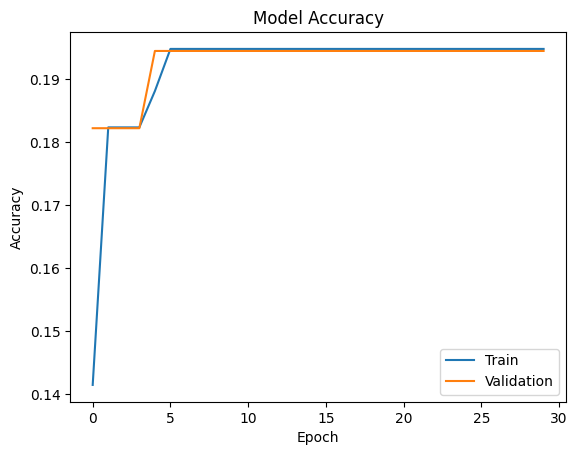

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

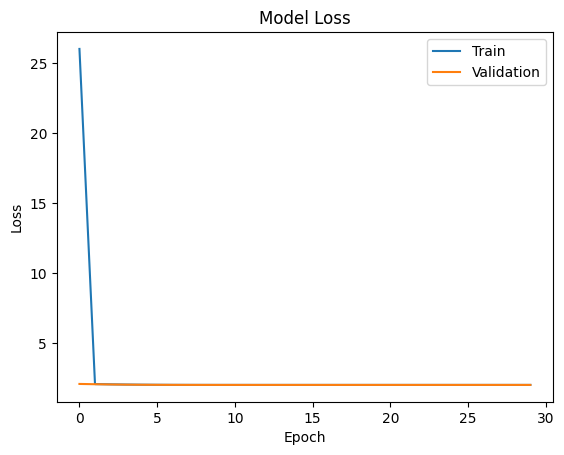

In [ ]:
# Plots the training and validation loss over the number of epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

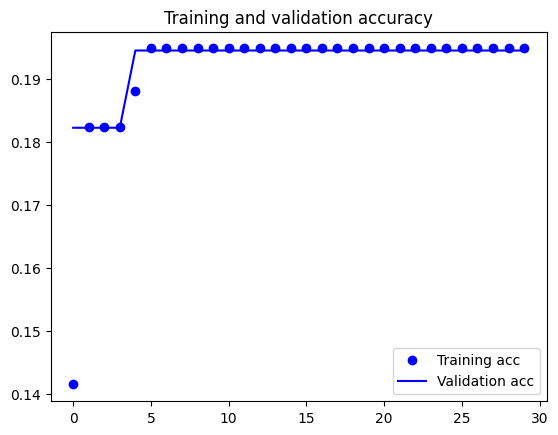

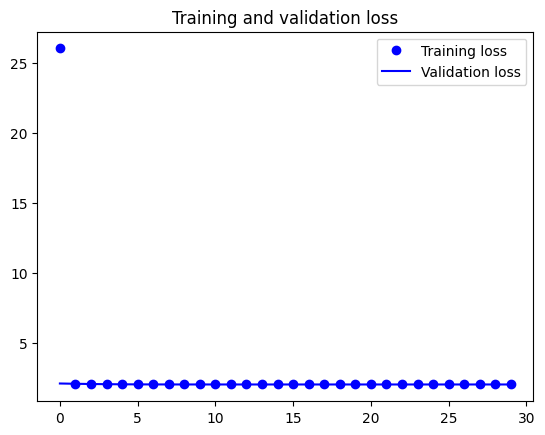

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Discussion

Model 2 without convolutional layers perfomed with very less accuracy of 0.19 and loss of 2.00.

Model was evaluated on test data and accuracy was 0.19 and loss of 2.00.

Model architecture was changed increasing dense layers to improve accuracy. But the model accuracy haven't had any significant changes.

Optimizer was changed and checked the accuracy as well. SGD, RMSprop and Adam were  used and Adam optimizer gave the best performance out of the 3.

Number of epochs and batch size values were changed and used to identiy best model as well.

Graphs of accuracy value shows that it becomes stationary and does not change over time. Loss graph also becomes stationary over time.

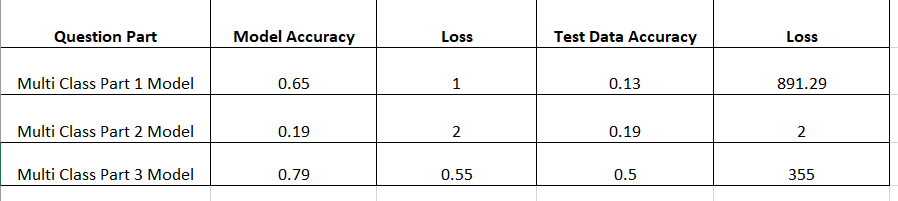

Above table shows that even though model accuracy is less than other two models accuracy on test data is higher than the model 1.